# DeepSVDD  -  Deep One-Class Classification for outlier detection
### Deep One-Class Classifier with AutoEncoder (AE) is a type of neural networks for learning useful data representations in an unsupervised way. DeepSVDD trains a neural network while minimizing the volume of a hypersphere that encloses the network representations of the data, forcing the network to extract the common factors of variation. Similar to PCA, DeepSVDD could be used to detect outlying objects in the data by calculating the distance from center
Source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.deep_svdd

### Arguments that work with DeepSVDD  algorithm:
1. c=c,
2. use_ae=use_ae,
3. hidden_neurons
4. hidden_activation
5. output_activation
6. optimizer
7. epochs
8. batch_size
9. dropout_rate
10. l2_regularizer
11. validation_size
12. preprocessing
13. verbose
14. random_state
15. contamination

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   251.465523 seconds
image downsampling       ...took     4.103348 seconds
image downsampling       ...took    10.746867 seconds
image downsampling       ...took    17.099037 seconds
image downsampling       ...took    19.906318 seconds
image downsampling       ...took    28.335284 seconds
image downsampling       ...took    31.149994 seconds
image downsampling       ...took    37.511231 seconds
image downsampling       ...took    40.327538 seconds
image downsampling       ...took    43.170169 seconds
image downsampling       ...took    49.733132 seconds
image downsampling       ...took    56.060392 seconds
image downsampling       ...took    62.407339 seconds
image downsampling       ...took    68.702136 seconds
image downsampling       ...took    71.544625 seconds
image downsampling       ...took    74.345745 seconds
image downsampling       ...took    80.727294 seconds
image downsampling       ...took    83.537673 seconds
image downsampling       ...

2022-08-25 17:49:16.429812: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:b7:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2022-08-25 17:49:16.436674: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-08-25 17:49:16.956692: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-08-25 17:49:16.956732: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2022-08-25 17:49:16.956738: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2022-08-25 17:49:16.964203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 37432 MB memory) -> physical GPU (device: 0, name: A100-SXM4-40GB, pci bus id: 0000:b7:00.0, compute capabili

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4096)]            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                262144    
_________________________________________________________________
net_output (Dense)           (None, 32)                2048      
_________________________________________________________________
tf.math.subtract_1 (TFOpLamb (None, 32)                0         
_________________________________________________________________
tf.math.pow_1 (TFOpLambda)   (None, 32)                0         
_________________________________________________________________
tf.math.reduce_sum_1 (TFOpLa (None,)                   0         
_________________________________________________________________
tf.math.reduce_mean_1 (TFOpL ()                        0   

3/3 [==============================] - 0s 11ms/step - loss: 4.2950 - val_loss: 24.9809
Epoch 69/100
3/3 [==============================] - 0s 11ms/step - loss: 4.0337 - val_loss: 23.5575
Epoch 70/100
3/3 [==============================] - 0s 11ms/step - loss: 3.9420 - val_loss: 23.3828
Epoch 71/100
3/3 [==============================] - 0s 11ms/step - loss: 5.2340 - val_loss: 24.8063
Epoch 72/100
3/3 [==============================] - 0s 11ms/step - loss: 4.1650 - val_loss: 17.1755
Epoch 73/100
3/3 [==============================] - 0s 10ms/step - loss: 4.0862 - val_loss: 20.0329
Epoch 74/100
3/3 [==============================] - 0s 25ms/step - loss: 3.9797 - val_loss: 22.0194
Epoch 75/100
3/3 [==============================] - 0s 11ms/step - loss: 4.3360 - val_loss: 20.5894
Epoch 76/100
3/3 [==============================] - 0s 12ms/step - loss: 3.9898 - val_loss: 17.5261
Epoch 77/100
3/3 [==============================] - 0s 11ms/step - loss: 3.9754 - val_loss: 22.9230
Epoch 78/100


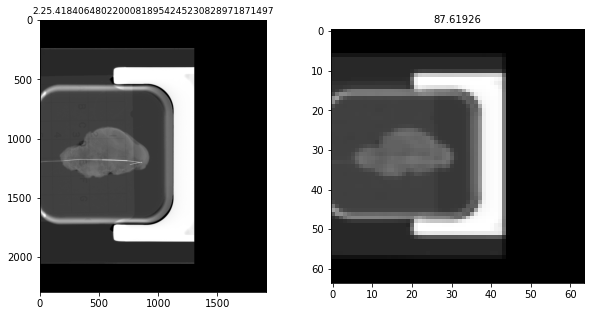

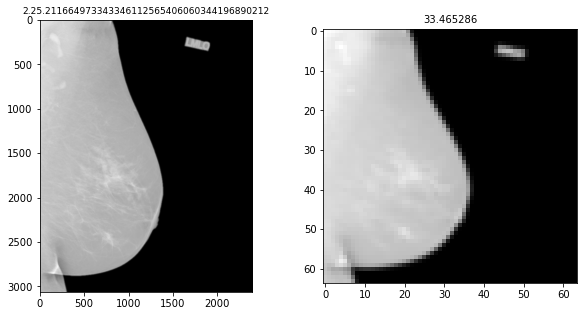

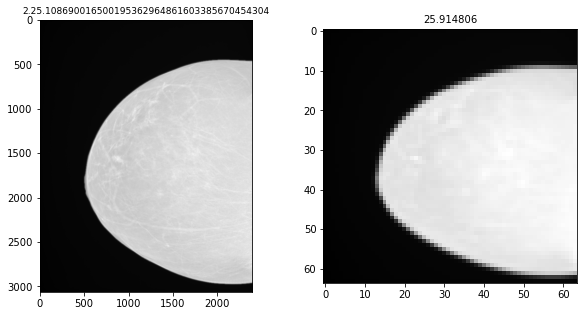

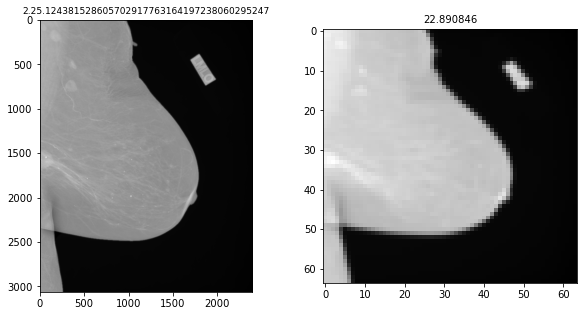

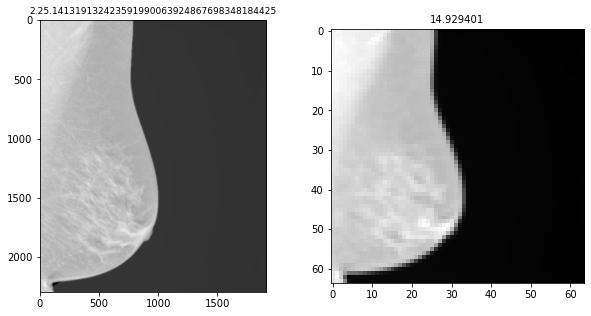

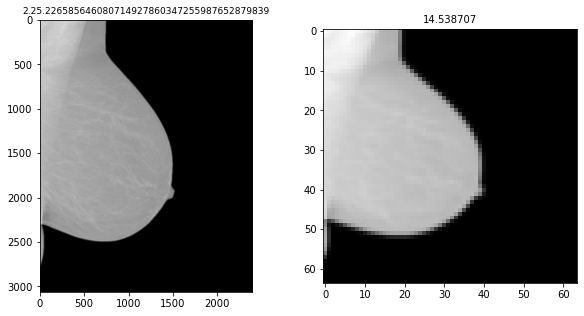

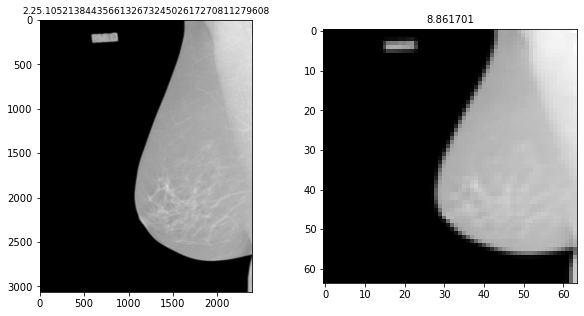

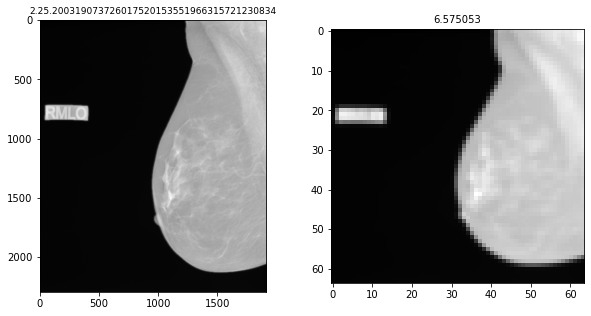

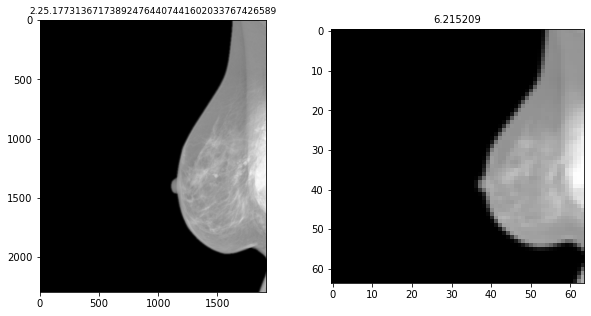

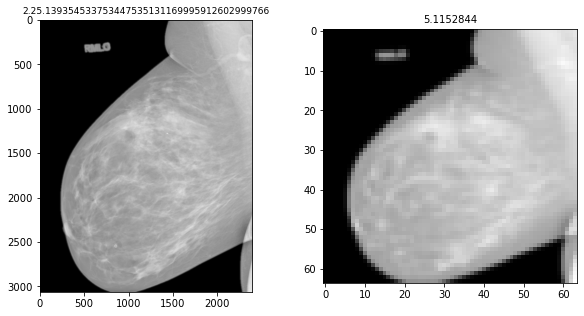

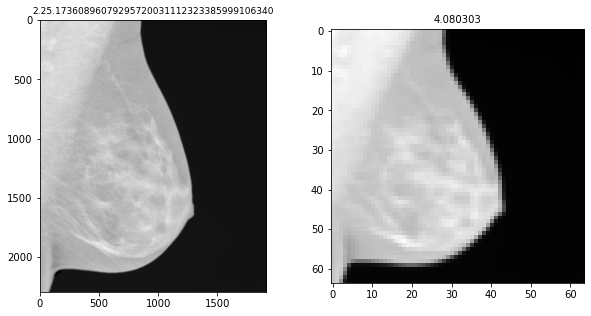

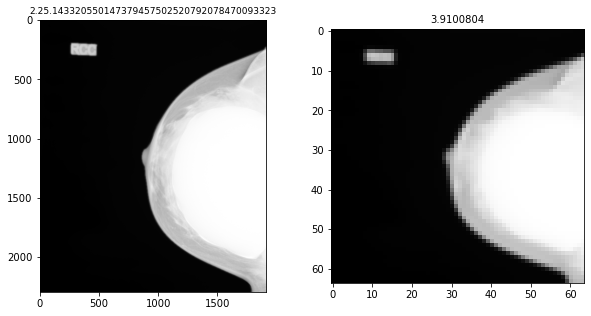

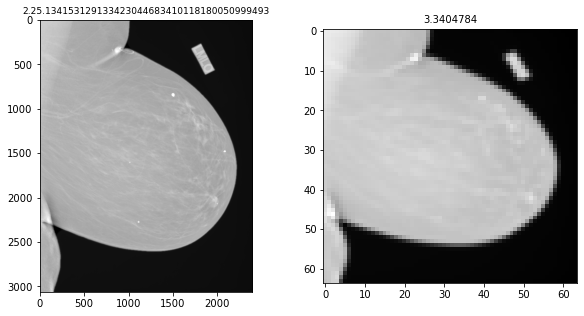

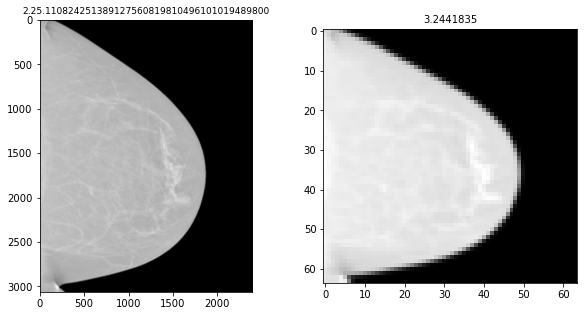

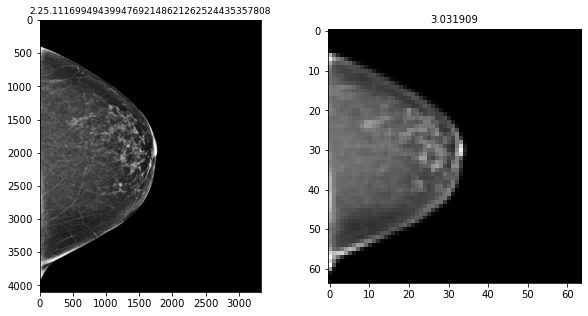

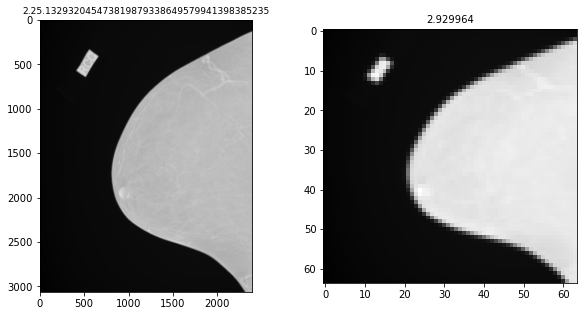

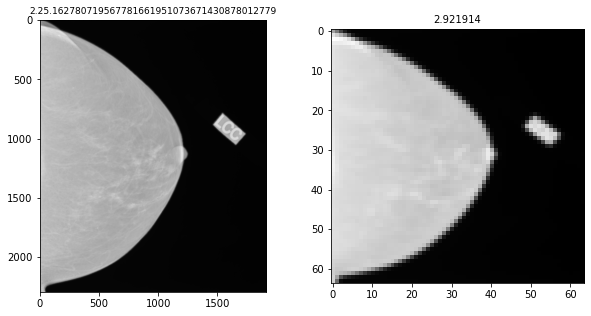

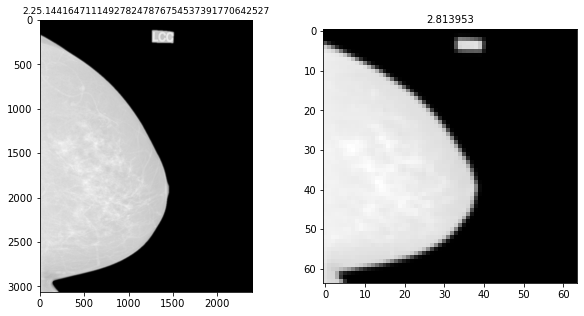

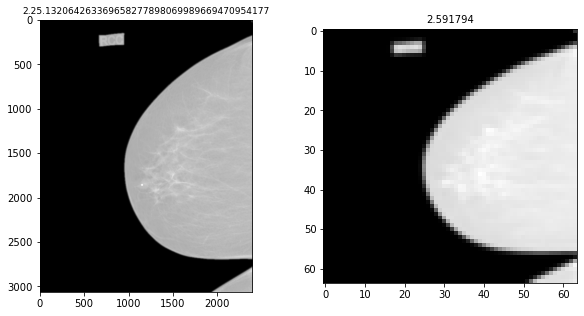

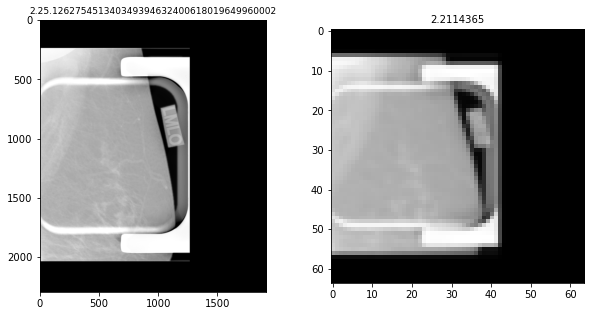

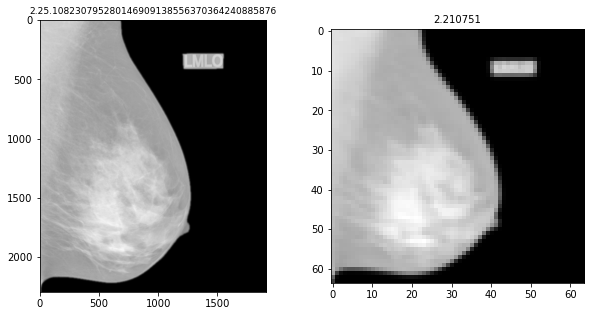

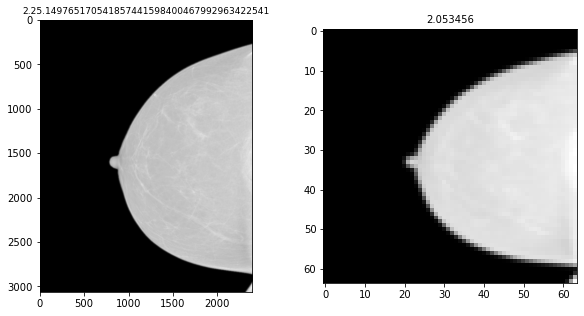

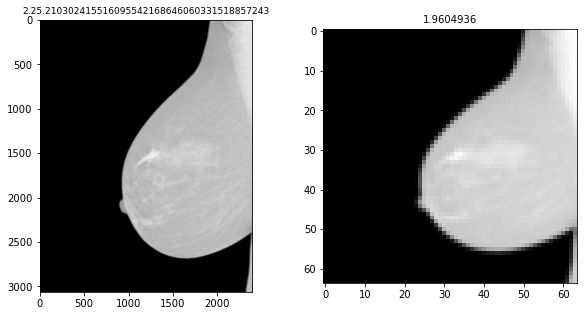

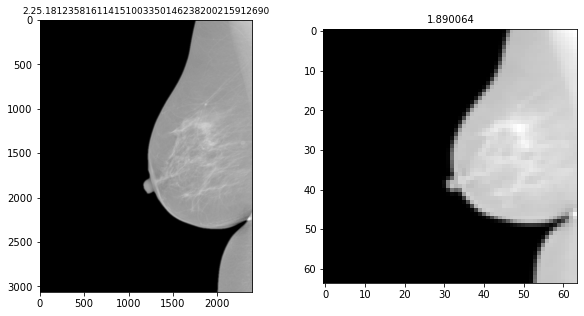

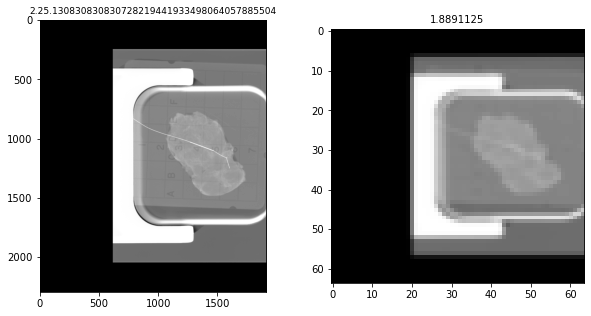

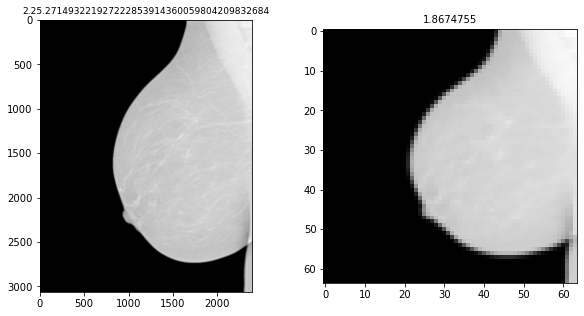

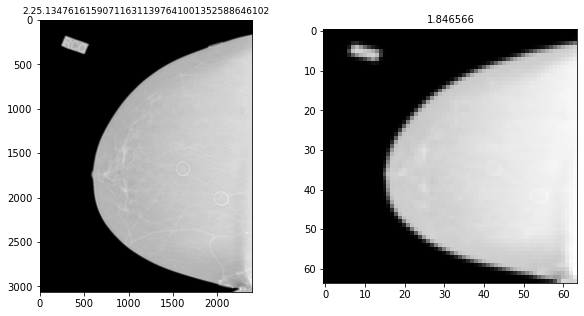

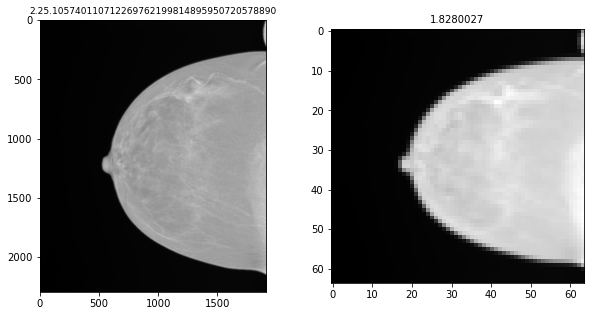

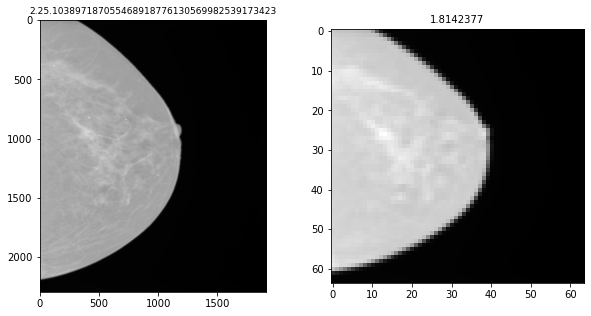

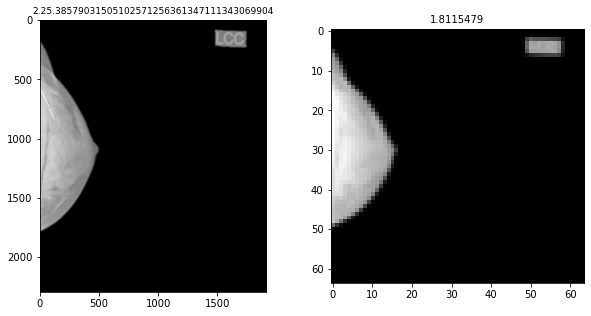

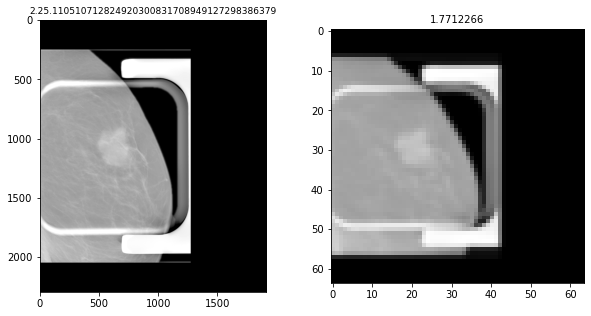

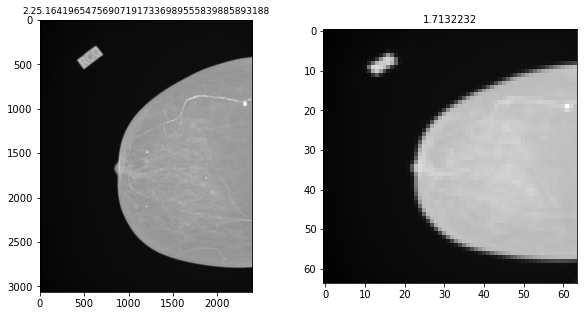

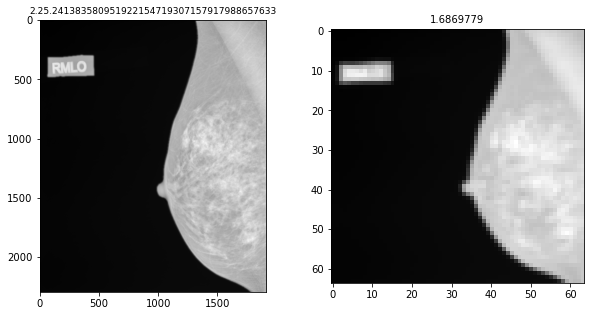

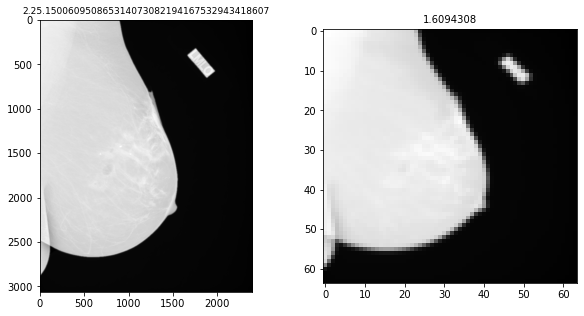

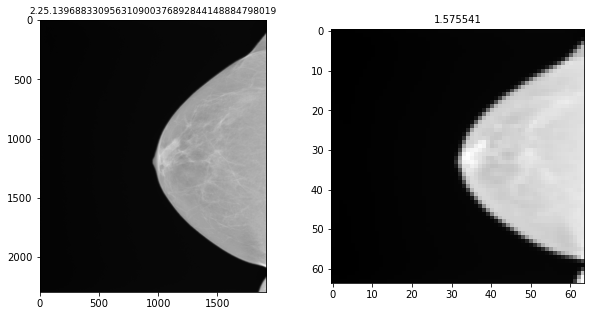

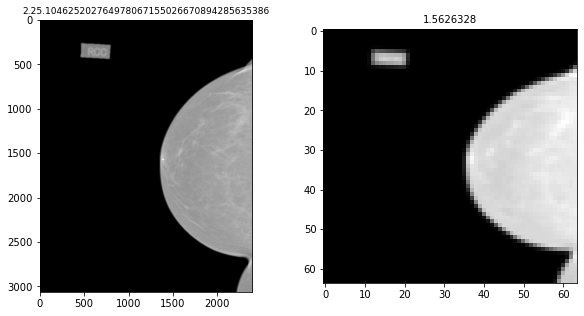

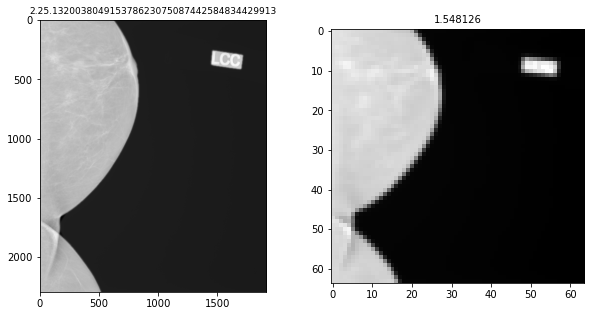

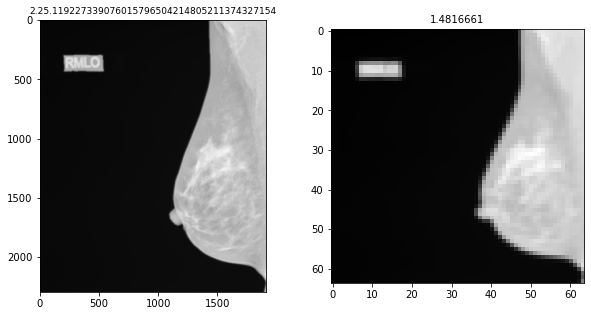

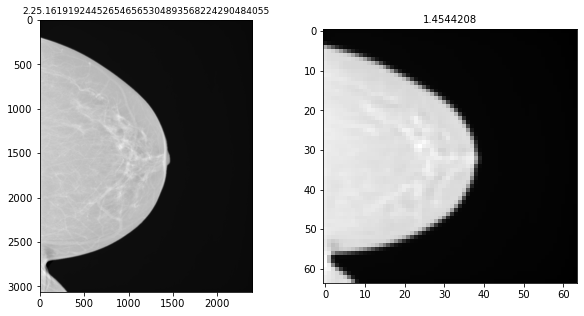

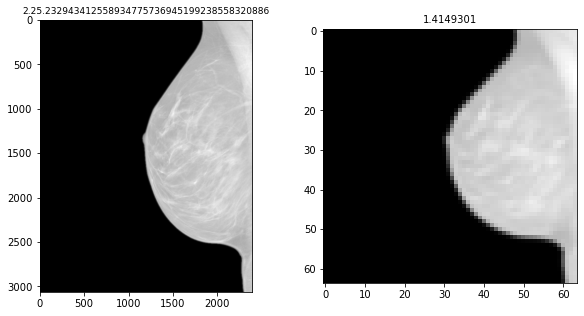

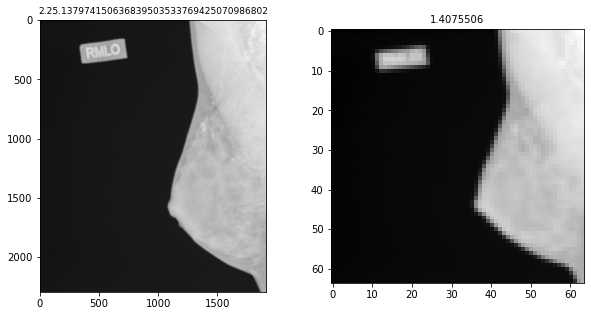

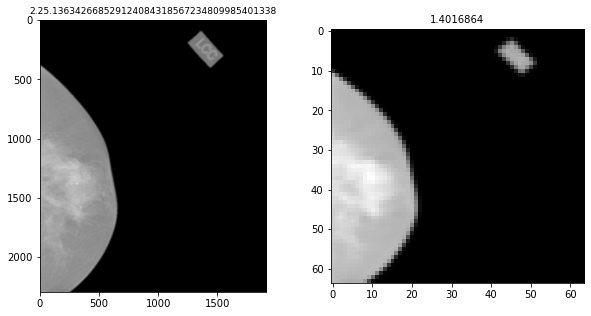

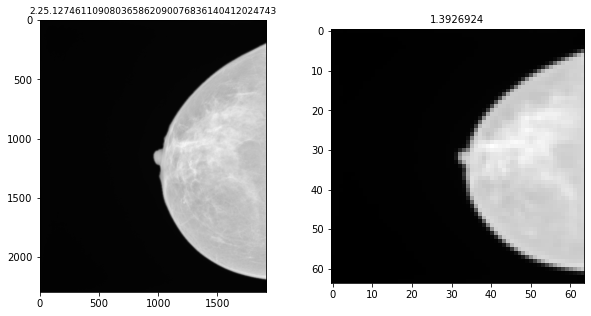

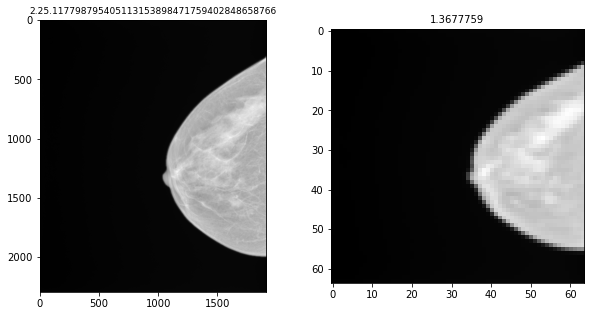

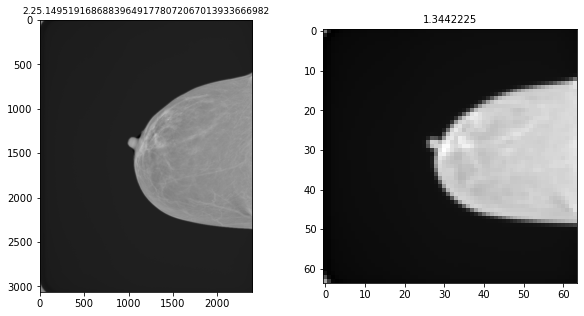

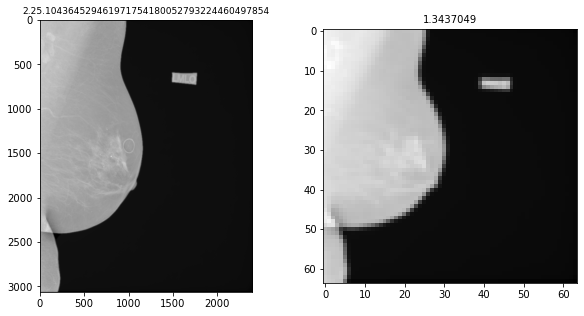

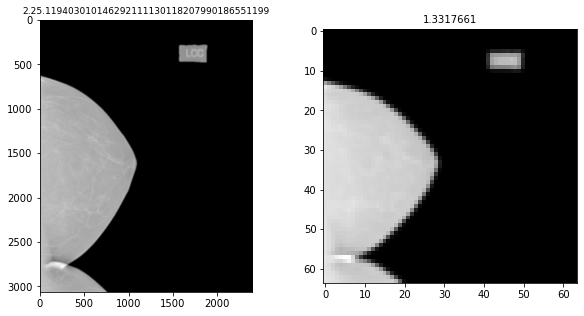

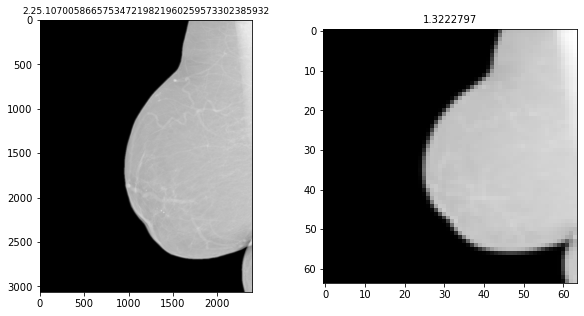

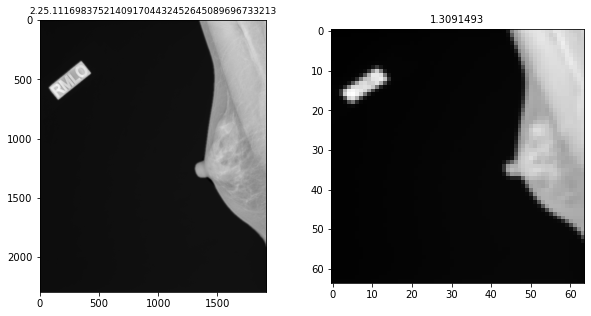

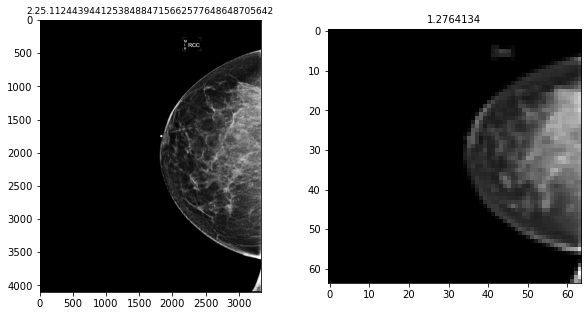

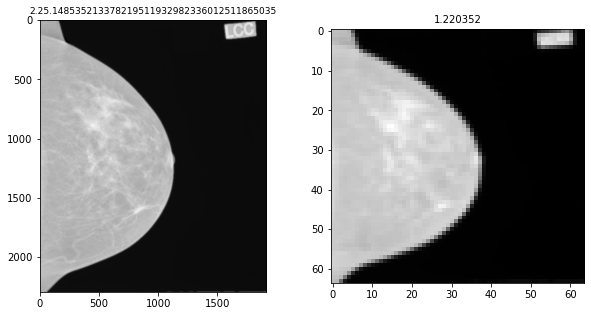

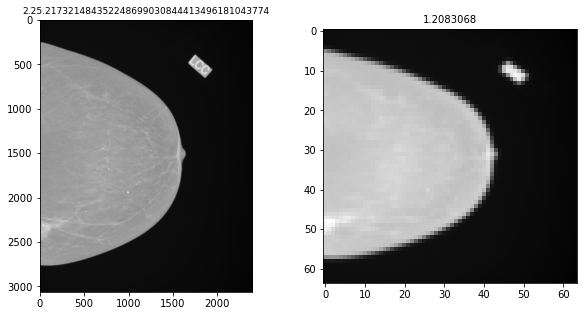

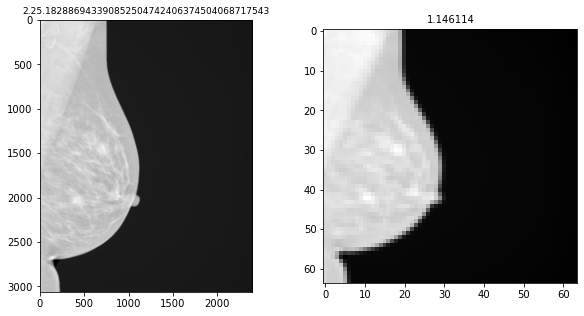

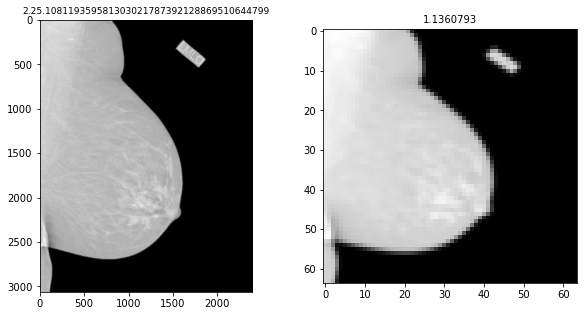

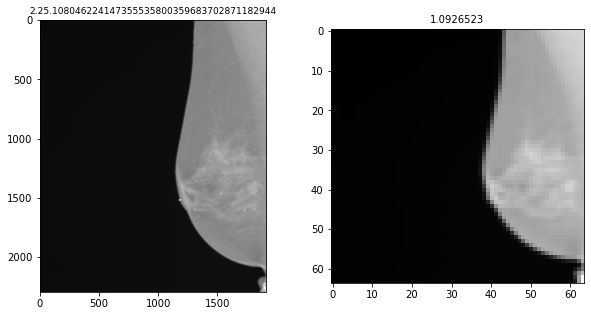

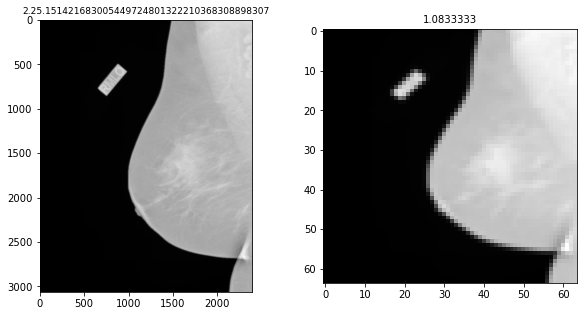

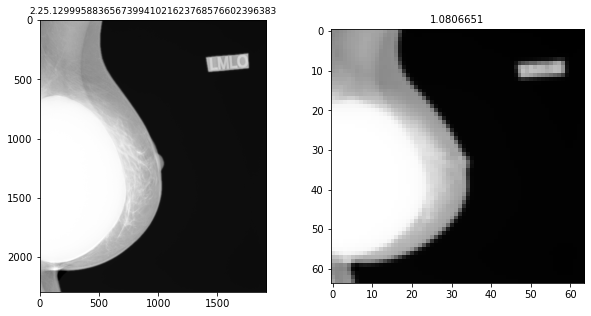

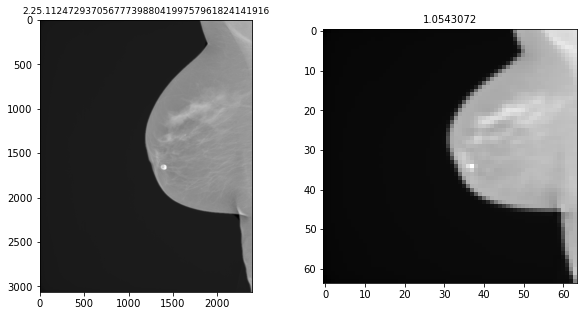

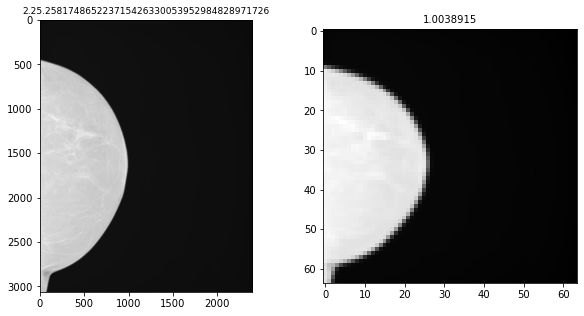

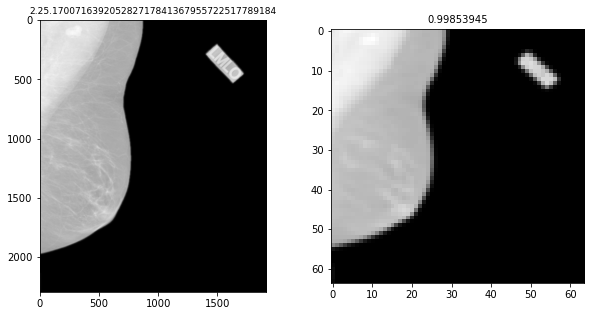

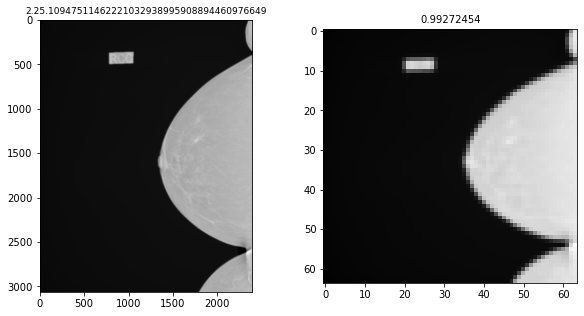

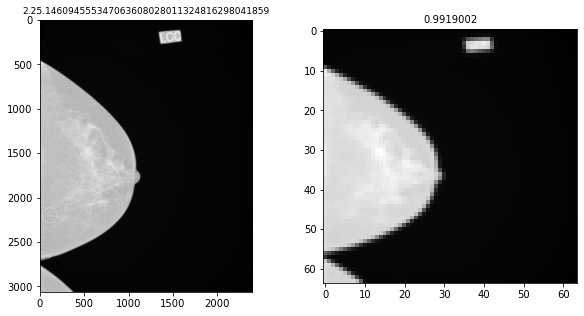

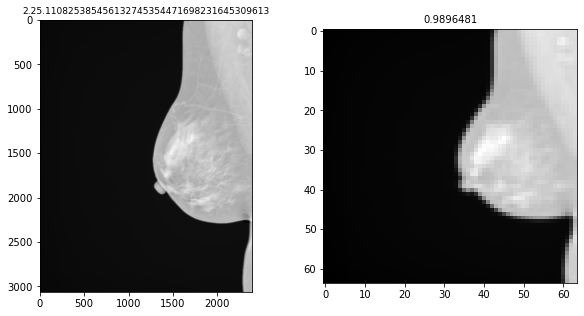

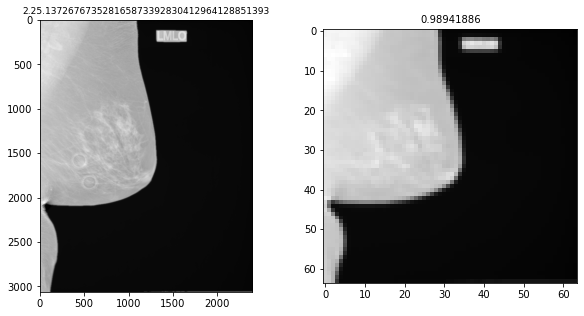

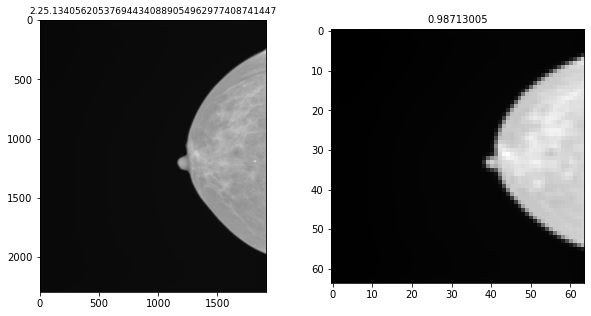

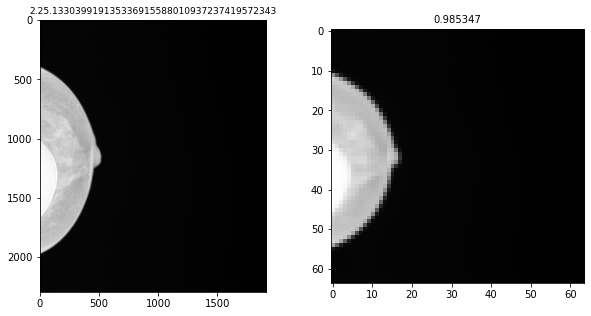

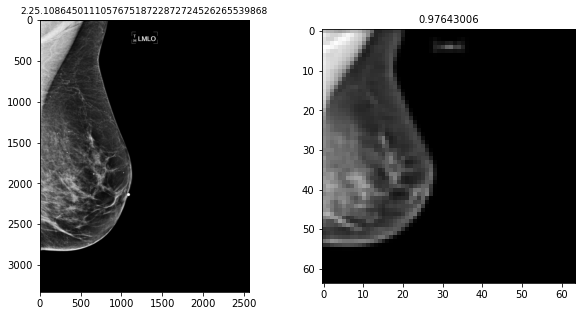

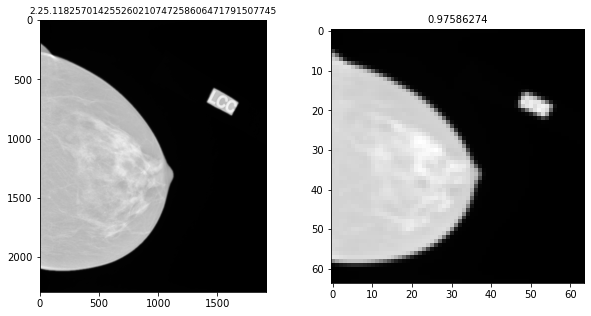

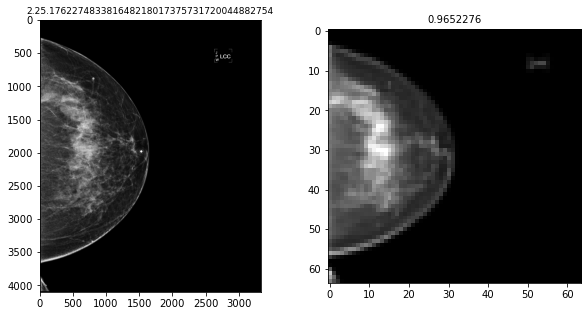

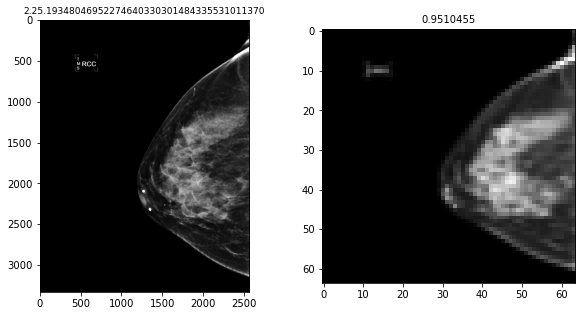

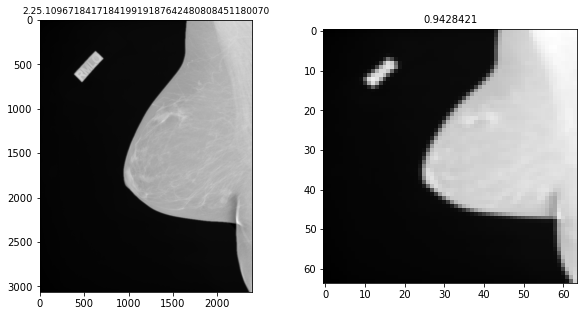

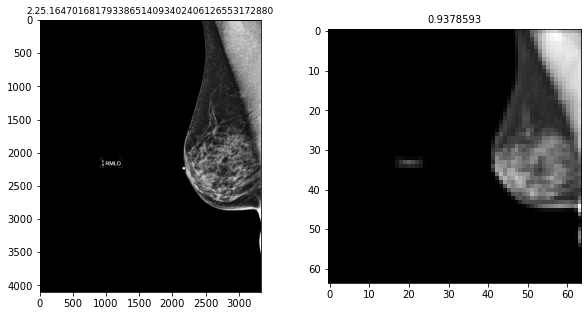

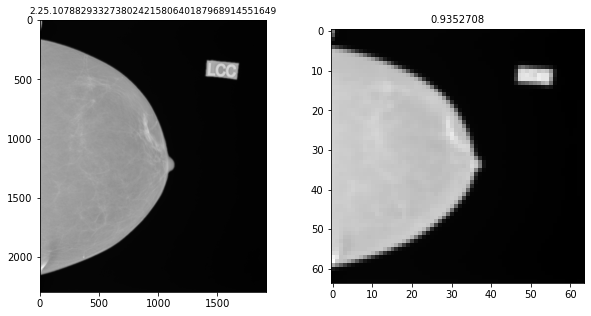

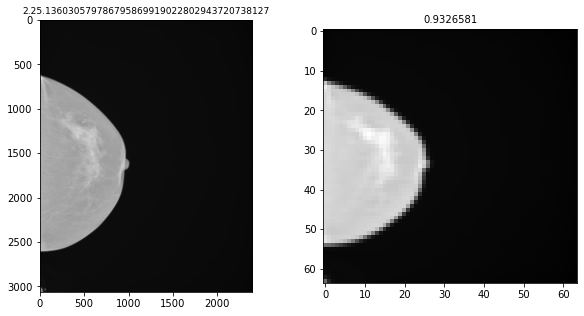

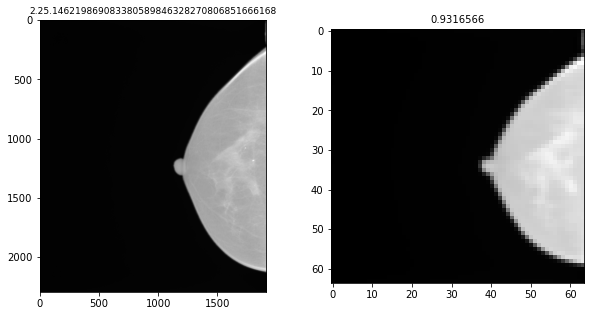

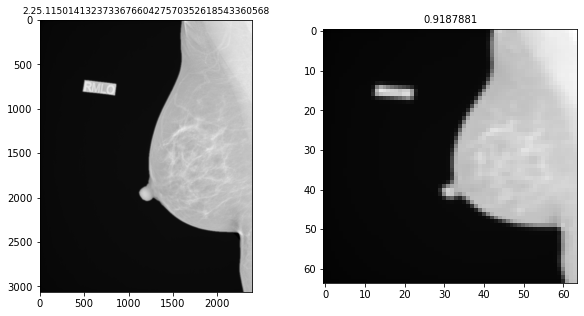

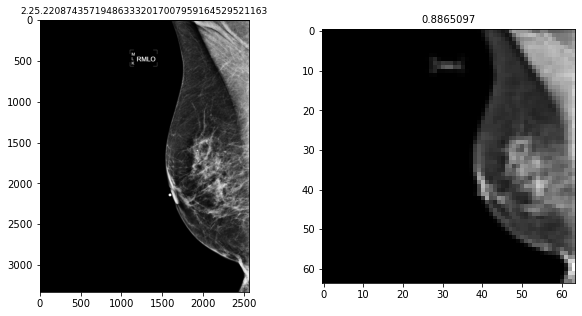

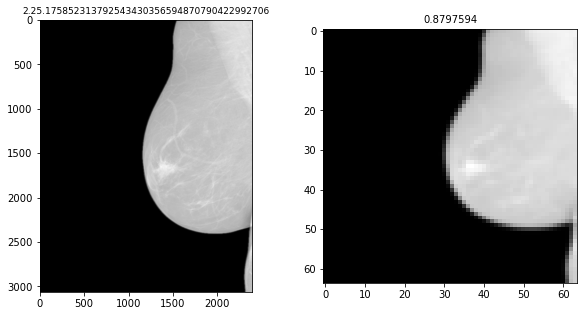

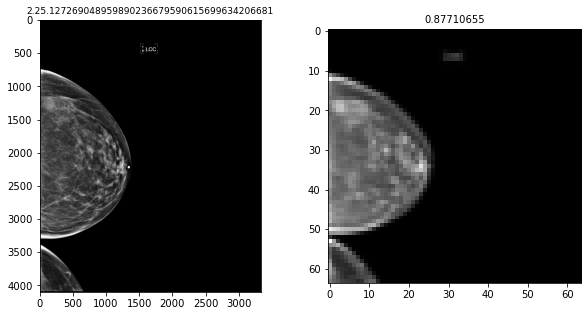

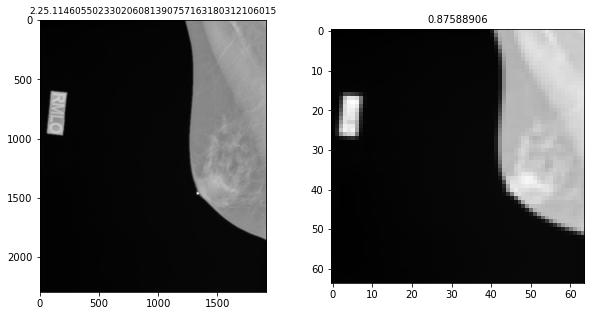

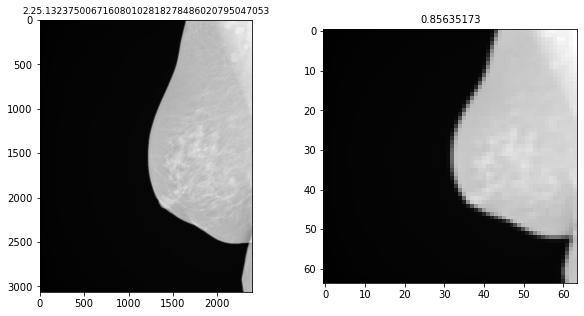

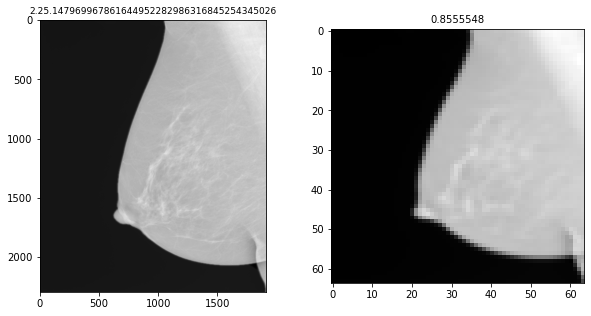

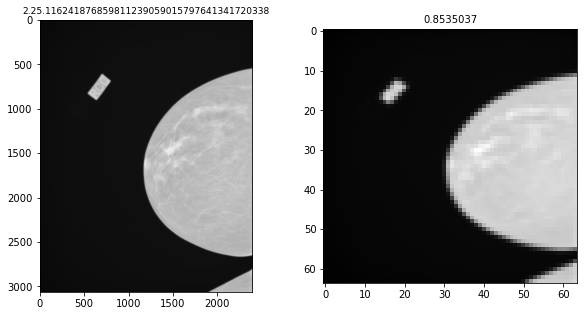

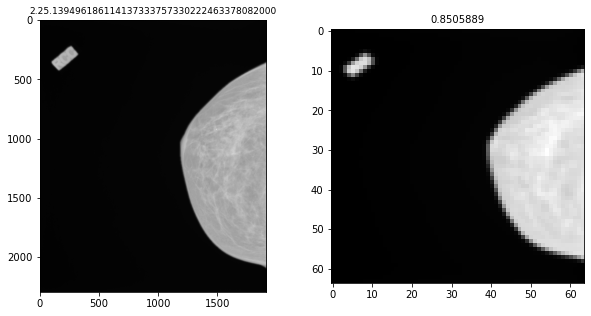

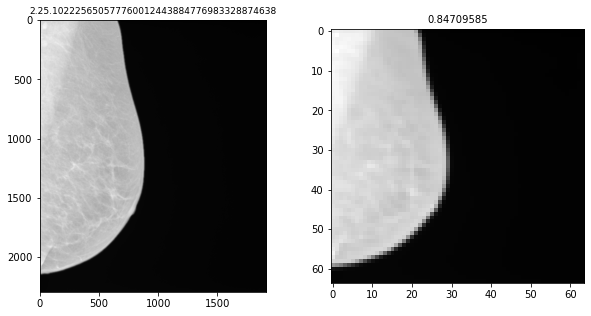

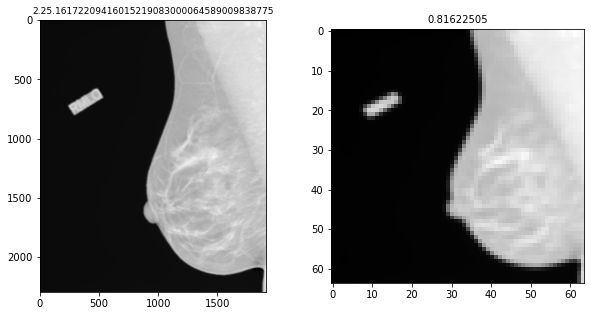

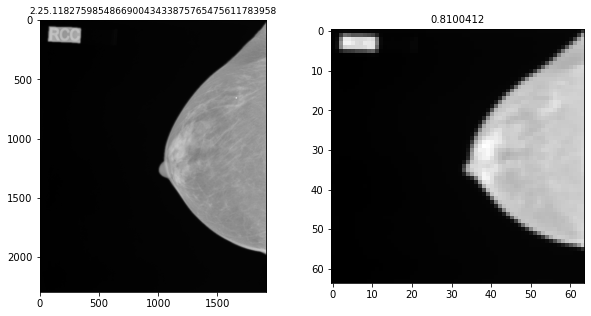

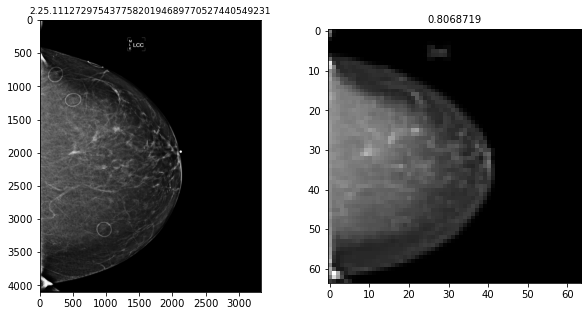

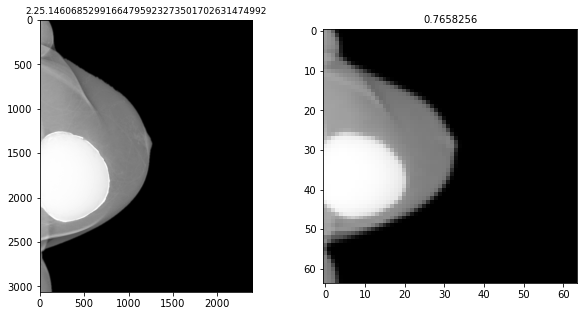

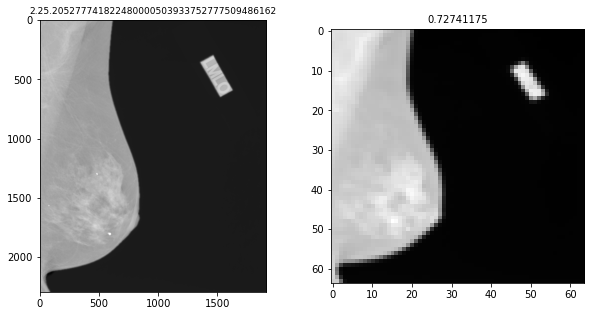

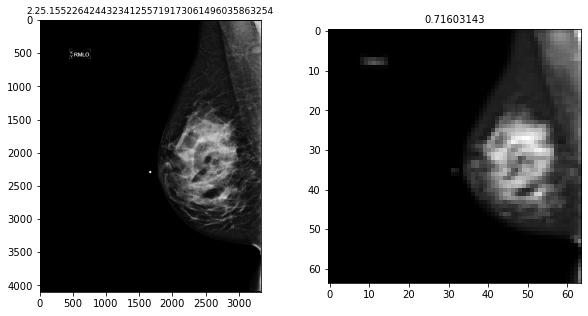

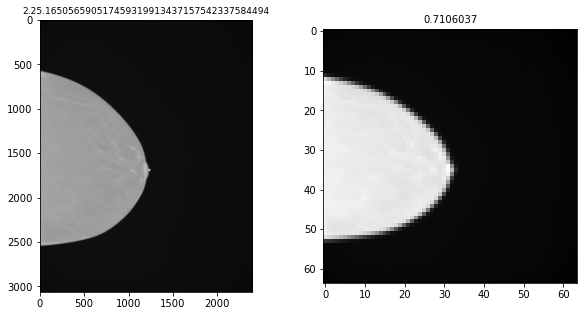

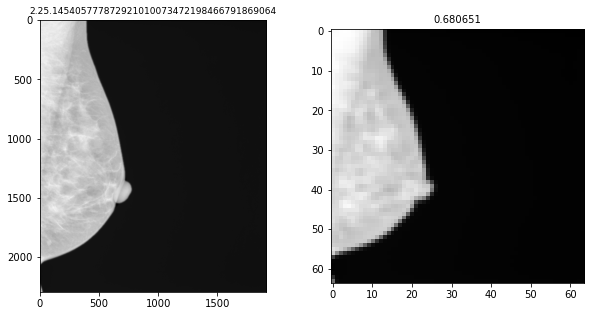

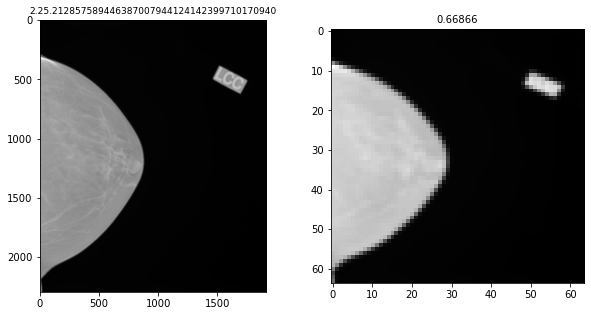

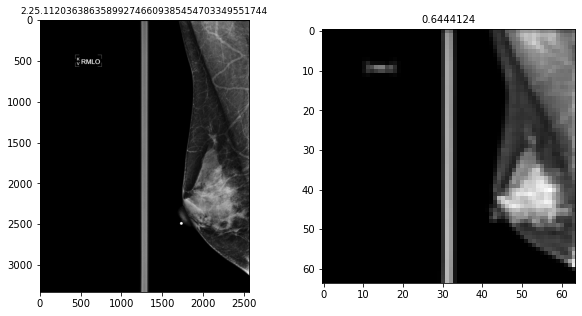

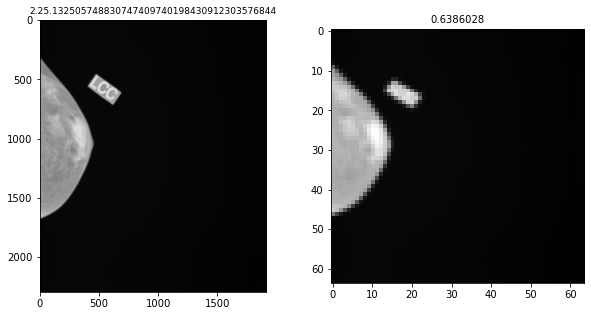

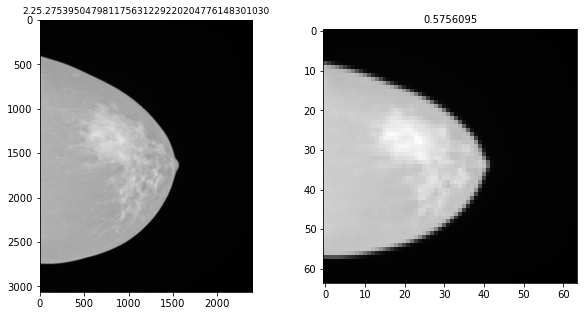

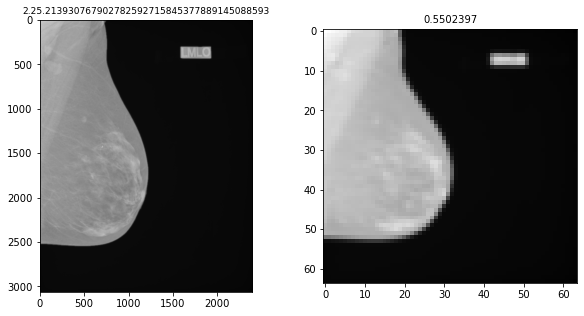

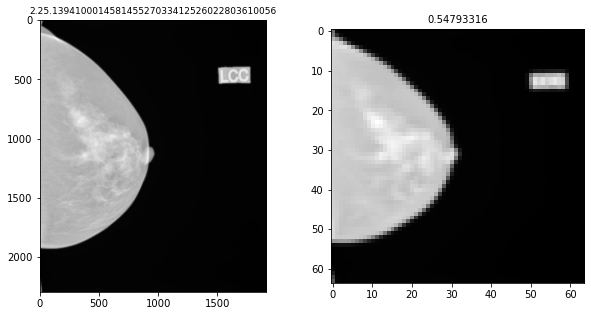

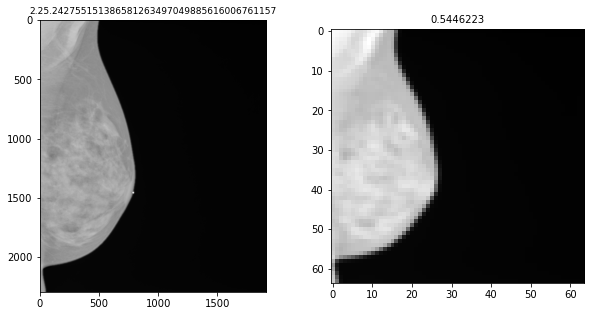

In [4]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='DeepSVDD')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])